<a href="https://colab.research.google.com/github/MillenaThalyne/Curso-Credit-Scoring/blob/main/Credit_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

In [ ]:
url = '/content/drive/MyDrive/Alura/Machine Learning com SKlearn/Credit Scoring/Dados/base_dados_traduzida.csv'
data = pd.read_csv(url)
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


# Informações do nosso dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [ ]:
#Vendo a quantidade de linhas e colunas do nosso dataset
linhas = data.shape[0]
colunas = data.shape[1]
print(linhas, colunas)

1000 21


In [ ]:
#verificando dados duplicados
duplicados = data.duplicated()
duplicados = duplicados.sum()
duplicados

0

In [ ]:
#Verificando dados nulos
nulos = data.isnull()
nulos = nulos.sum()

In [ ]:
print("Número de duplicados é {} e dados nulos: {}".format(duplicados, nulos))

Número de duplicados é 0 e dados nulos: default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64


# Transformando parâmetros categóricos em numéricos

In [ ]:
data.head(5)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
data['conta_corrente'].unique()

array(['< 0 DM', '0 <= ... < 200 DM', 'no checking account',
       '>= 200 DM / salary assignments for at least 1 year'], dtype=object)

In [ ]:
cc = {'< 0 DM': 1, '0 <= ... < 200 DM': 2, 'no checking account': 3, '>= 200 DM / salary assignments for at least 1 year': 4}
data['conta_corrente'] = data['conta_corrente'].map(cc)

In [ ]:
data['historico_credito'].unique()

array(['critical account/ other credits existing (not at this bank)',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'no credits taken/ all credits paid back duly',
       'all credits at this bank paid back duly'], dtype=object)

In [ ]:
hc = {'critical account/ other credits existing (not at this bank)': 1, 'existing credits paid back duly till now': 2, 'delay in paying off in the past': 3, 'no credits taken/ all credits paid back duly': 4,'all credits at this bank paid back duly': 5}
data['historico_credito'] = data['historico_credito'].map(hc)

In [ ]:
data['proposito_emprestimo'].unique()

array(['domestic appliances', '(vacation - does not exist?)',
       'radio/television', 'car (new)', 'car (used)', 'business',
       'repairs', 'education', 'furniture/equipment', 'retraining'],
      dtype=object)

In [ ]:
pe = {'domestic appliances': 1,'(vacation - does not exist?)': 2,'radio/television': 3,'car (new)': 4 , 'car (used)':5, 'business': 6, 'repairs': 7, 'education': 8,'furniture/equipment':9,'retraining':10}
data['proposito_emprestimo'] = data['proposito_emprestimo'].map(pe)

In [ ]:
data['reserva_cc'].unique()

array(['unknown/ no savings account', '... < 100 DM',
       '500 <= ... < 1000 DM ', '.. >= 1000 DM ', '100 <= ... < 500 DM'],
      dtype=object)

In [ ]:
rec = {'unknown/ no savings account': 1, '... < 100 DM': 2,
       '500 <= ... < 1000 DM ': 3, '.. >= 1000 DM ': 4, '100 <= ... < 500 DM': 5}
data['reserva_cc'] = data['reserva_cc'].map(rec)

In [ ]:
data['tempo_emprego_atual'].unique()

array(['.. >= 7 years', '1 <= ... < 4 years', '4 <= ... < 7 years',
       'unemployed', '... < 1 year '], dtype=object)

In [ ]:
tea = {'.. >= 7 years': 1, '1 <= ... < 4 years': 2, '4 <= ... < 7 years': 3,
       'unemployed': 4, '... < 1 year ': 5}
data['tempo_emprego_atual'] = data['tempo_emprego_atual'].map(tea)

In [ ]:
data['sexo_est_civil'].unique()

array(['male : single', 'female : divorced/separated/married',
       'male : divorced/separated', 'male : married/widowed'],
      dtype=object)

In [ ]:
sex = {'male : single':1, 'female : divorced/separated/married': 2,
       'male : divorced/separated': 3, 'male : married/widowed': 4}
data['sexo_est_civil'] = data['sexo_est_civil'].map(sex) 

In [ ]:
a = { 'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3    
}
data['outros_fiadores'] = data['outros_fiadores'].map(a)

In [ ]:
a = { 'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4 
}
data['propriedade'] = data['propriedade'].map(a)

In [ ]:
a = { 'bank' : 1,
      'stores' : 2,
      'none' : 3 
}

data['outros_planos_financiamento'] = data['outros_planos_financiamento'].map(a)

In [ ]:
b = { 'rent' : 1,
      'own' : 2,
      'for free' : 3 
}

data['tipo_residencia'] = data['tipo_residencia'].map(b)

In [ ]:
a = { 'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
}
data['status_emprego'] = data['status_emprego'].map(a)

In [ ]:
a = { 'yes, registered under the customers name ' : 1,
      'none' : 0
}
data['telefone'] = data['telefone'].map(a)

In [ ]:
a = { 'yes' : 1,
      'no' : 0
}
data['trabalhador_estrangeiro'] = data['trabalhador_estrangeiro'].map(a)

In [ ]:
data.tail()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
995,0,3,12,2,3,1736,2,3,3,2,...,4,1,31,3,2,1,2,1,0,1
996,0,1,30,2,5,3857,2,2,4,3,...,4,2,40,3,2,1,4,1,1,1
997,0,3,12,2,1,804,2,1,4,1,...,4,3,38,3,2,1,3,1,0,1
998,1,1,45,2,1,1845,2,2,4,1,...,4,4,23,3,3,1,3,1,1,1
999,0,2,45,1,5,4576,5,4,3,1,...,4,3,27,3,2,1,3,1,0,1


#Treinamento

In [ ]:
#Separando x e y do dataset
y = data['default']
x = data.drop(columns = 'default')

In [ ]:
#Separação dos treinos e testes
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state=SEED)
base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]
print("A base de treino tem {} elementos e a base de teste tem {} elementos".format(base_treino, base_teste))

A base de treino tem 700 elementos e a base de teste tem 300 elementos


In [ ]:
#Treinamento com o modelo LogisticRegression
modelo = LogisticRegression(max_iter=1000)
modelo.fit(treino_x, treino_y)

LogisticRegression(max_iter=1000)

In [ ]:
#Predict
previsoes = modelo.predict(teste_x)

In [ ]:
#Score é = acurácia de treino (métrica estatística)
print(round(modelo.score(treino_x, treino_y), 2)*100)

75.0


# Métricas e Matriz de confusão

In [ ]:
#Acurácia
acuracia = accuracy_score(teste_y, previsoes)
round(acuracia, 2)*100

78.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


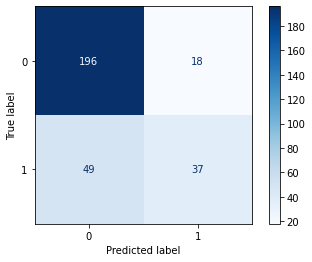

In [ ]:
#Plotando Matrix de confusão 
matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, cmap='Blues', values_format='.3g')
matriz_confusao

In [ ]:
#Chamando a função classification_report para melhorar nossa visualização da matriz de confusão
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       214
           1       0.67      0.43      0.52        86

    accuracy                           0.78       300
   macro avg       0.74      0.67      0.69       300
weighted avg       0.76      0.78      0.76       300



# Curva ROC

In [ ]:
#Chamando a curva roc para termos mais detalhes da matriz de confusão
#tfp (Taxa falsos positivos), tvp (Taxa verdadeiros positivos)
prob_previsao = modelo.predict_proba(teste_x) [:, 1]
tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('Roc_auc', roc_auc_score(teste_y, prob_previsao))

Roc_auc 0.7681482286459466


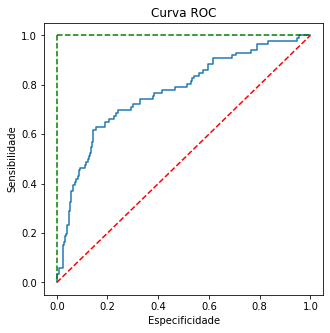

In [ ]:
#Plotando nossa curva roc em um gráfico
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

#Área > 0.8 então discriminação excelente!

# Análise descritiva das variáveis

In [ ]:
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
data[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.686000,35.546000,20.903000,3271.258000,0.300000
std,0.931811,11.375469,12.058814,2822.736876,0.458487
min,1.000000,19.000000,4.000000,250.000000,0.000000
25%,1.000000,27.000000,12.000000,1365.500000,0.000000
50%,1.000000,33.000000,18.000000,2319.500000,0.000000
75%,2.000000,42.000000,24.000000,3972.250000,1.000000
max,4.000000,75.000000,72.000000,18424.000000,1.000000


In [ ]:
data['sexo_est_civil'].value_counts()
#310 mulheres e 690 homens

1    548
2    310
4     92
3     50
Name: sexo_est_civil, dtype: int64

In [ ]:
data['default'].value_counts()
#Ter mais valores 0 diz que negamos mais créditos do que aceitamos. Isso nos diz que nossa base de dados é desbalanceada
#Isso também nos mostra que, pela base estar desbalanceada, a acurácia não se torna um bom parâmetro de comparação para nos dizer que a IA está sendo realmente precisa

0    700
1    300
Name: default, dtype: int64

# Histogramas boxplot e gráfico de barras


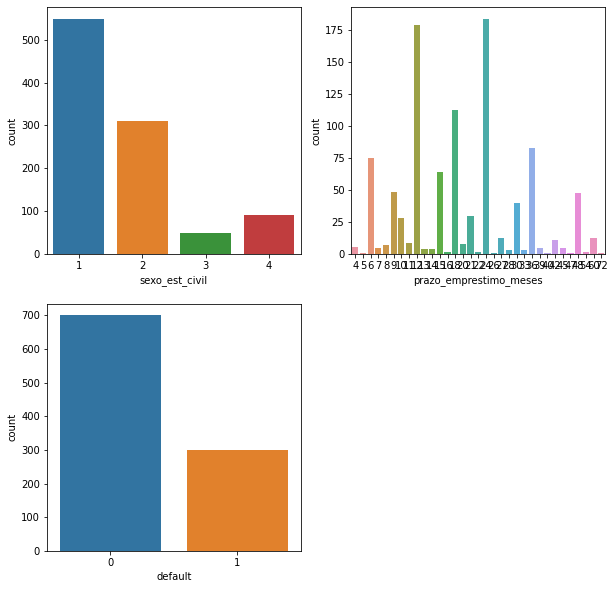

In [ ]:
histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']
lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize= (10, 10))

for i in lista_histogramas:
  plt.subplot(2, 2, i[0]+1)
  sns.countplot(x = i[1], data = data)

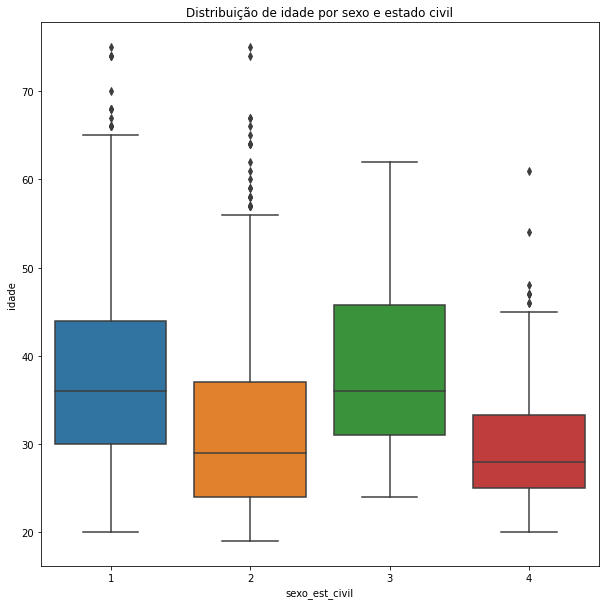

In [ ]:
#Gráfico de boxplot
plt.figure(figsize= (10, 10))
sns.boxplot(x = 'sexo_est_civil', y= 'idade', data = data)
plt.title('Distribuição de idade por sexo e estado civil')

plt.show()

Text(0.5, 1.0, 'Valor x prazo e meses')

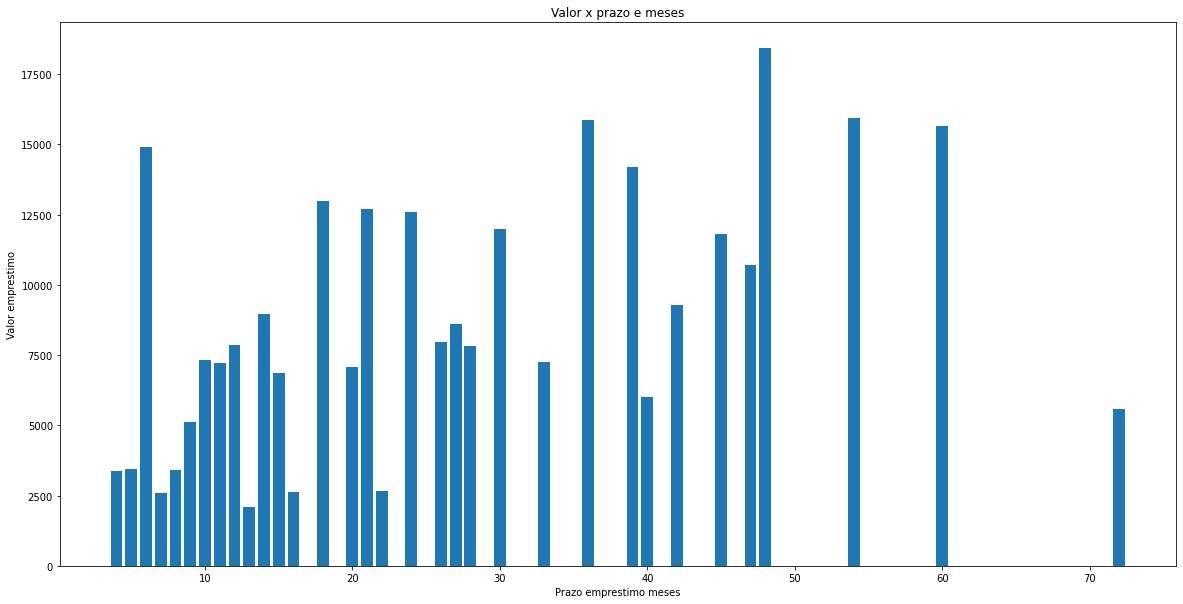

In [ ]:
#Gráfico de barras
plt.figure(figsize= (20, 10))
plt.bar(data.prazo_emprestimo_meses, data.valor_emprestimo)

plt.xlabel('Prazo emprestimo meses')
plt.ylabel('Valor emprestimo')
plt.title('Valor x prazo e meses')

# Separamos variáveis sexo e estado civil

In [ ]:
#categorias da variavel 'sexo_est_civil'

#male : divorced/separated = 1
#female : divorced/separated/married = 2
#male : single = 3
#male : married/widowed = 4
#female : single = 5

#criando a variavel 'sexo'

## 1 = mulher
## 0 = homem

#criando a variavel 'estado_civil'
## 1 = solteira
## 0 = casada/divorciada/viúva

dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}

data['sexo'] = data['sexo_est_civil'].map(dic_sexo)
data['estado_civil'] = data['sexo_est_civil'].map(dic_est_civil)

data.head(10)


,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,...,67,3,2,2,3,1,1,1,0,0
1,1,2,48,2,1,5951,2,2,2,2,...,22,3,2,1,3,1,0,1,1,0
2,0,3,12,1,2,2096,2,3,2,1,...,49,3,2,1,2,2,0,1,0,0
3,0,1,42,2,3,7882,2,3,2,1,...,45,3,3,1,3,2,0,1,0,0
4,1,1,24,3,4,4870,2,2,3,1,...,53,3,3,2,3,2,0,1,0,0
5,0,3,36,2,2,9055,1,2,2,1,...,35,3,3,1,2,2,1,1,0,0
6,0,3,24,2,3,2835,3,1,3,1,...,53,3,2,1,3,1,0,1,0,0
7,0,2,36,2,5,6948,2,2,2,1,...,35,3,1,1,4,1,1,1,0,0
8,0,3,12,2,1,3059,4,3,2,3,...,61,3,2,1,2,1,0,1,0,1
9,1,2,30,1,4,5234,2,4,4,4,...,28,3,2,2,4,1,0,1,0,0


#Ajuste de Modelo

In [ ]:
colunas_retiradas = ['sexo_est_civil', 'sexo']
base_dados = data.drop(columns = colunas_retiradas)
base_dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,...,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,...,1,67,3,2,2,3,1,1,1,0
1,1,2,48,2,1,5951,2,2,2,1,...,1,22,3,2,1,3,1,0,1,0
2,0,3,12,1,2,2096,2,3,2,1,...,1,49,3,2,1,2,2,0,1,0
3,0,1,42,2,3,7882,2,3,2,3,...,2,45,3,3,1,3,2,0,1,0
4,1,1,24,3,4,4870,2,2,3,1,...,4,53,3,3,2,3,2,0,1,0


In [ ]:
#Função para retirar colunas da base de dados

def roda_modelo(base_dados, classificador):

#separando a base de modelagem e variavel resposta

    y = base_dados['default']
    x = base_dados.drop(columns='default')

#separando a base de treino e teste

    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.30, random_state = SEED)

    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]
    print('A base de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))
    print(100*'-')

#ajustamdo modelo com base de teste
    
    modelo = classificador
    modelo.fit(treino_x, treino_y)

#-------------------------------------------------------------------------------------------------------------------------------------

#matriz de confusao

    matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format = '.3g', cmap = 'Blues')
    plt.title('Matriz de Confusao')
    plt.show

#classification report

    previsoes = modelo.predict(teste_x)

    print('\nClassification Report:')
    print(classification_report(teste_y, previsoes))

#curva ROC  e AUC

    print(100*'-')
    prob_previsao = modelo.predict_proba(teste_x)[:,1]
   
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
    print('roc_auc:', roc_auc_score(teste_y, prob_previsao))
    
    plt.subplots(1, figsize=(5,5))
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.plot([0, 1], ls="--", c = 'red') #plotando linha pontilhada guia para regressao aleatoria
    plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha pontilhada guia para regressao perfeita
    plt.ylabel('Sensibilidade')
    plt.xlabel('Especificidade')
    plt.show() 

    return modelo, matriz_confusao

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       214
           1       0.64      0.42      0.51        86

    accuracy                           0.77       300
   macro avg       0.72      0.66      0.68       300
weighted avg       0.75      0.77      0.75       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.7685829167572268


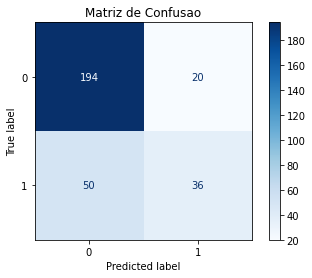

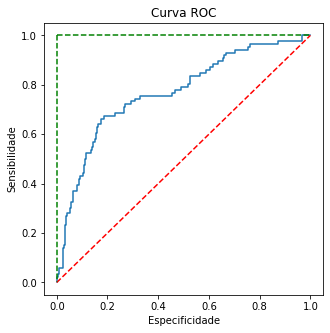

(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd34f6cc1d0>)

In [ ]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

#Faixas de Classificação
## Modelo Escolhido para o BiteBank

In [ ]:
#criando 'faixa_idade' para variavel 'idade'

## 18 - 30 = 1
## 31 - 40 = 2
## 41 - 50 = 3
## 51 - 60 = 4
## 61 - 70 = 5
## 71 - 80 = 6

data['faixa_idade'] = pd.cut(x = data['idade'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade
0,0,1,6,1,1,1169,1,1,4,1,...,3,2,2,3,1,1,1,0,0,5
1,1,2,48,2,1,5951,2,2,2,2,...,3,2,1,3,1,0,1,1,0,1
2,0,3,12,1,2,2096,2,3,2,1,...,3,2,1,2,2,0,1,0,0,3
3,0,1,42,2,3,7882,2,3,2,1,...,3,3,1,3,2,0,1,0,0,3
4,1,1,24,3,4,4870,2,2,3,1,...,3,3,2,3,2,0,1,0,0,4


In [ ]:
#criando 'faixa_prazo_emprestimo' para variavel 'prazo_emprestimo_meses'

## 01 - 12 = 1
## 13 - 24 = 2
## 25 - 36 = 3
## 37 - 48 = 4
## 49 - 60 = 5
## 61 - 72 = 6


data['faixa_prazo_emprestimo'] = pd.cut(x = data['prazo_emprestimo_meses'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,2,2,3,1,1,1,0,0,5,1
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,3,1,0,1,1,0,1,4
2,0,3,12,1,2,2096,2,3,2,1,...,2,1,2,2,0,1,0,0,3,1
3,0,1,42,2,3,7882,2,3,2,1,...,3,1,3,2,0,1,0,0,3,4
4,1,1,24,3,4,4870,2,2,3,1,...,3,2,3,2,0,1,0,0,4,2


In [ ]:
#criando 'faixa_valor_emprestimo' para variavel 'valor_emprestimo'

## 1 - 1000 = 1
## 1001 - 2000 = 2
## 2001 - 3000 = 3
## 3001 - 4000 = 4
## 4001 - 5000 = 5
## 5001 - 6000 = 6
## 6001 - 7000 = 7
## 7001 - 8000 = 8
## 8001 - 9000 = 9
## 9001 - 10000 = 10
## 10001 - 11000 = 11
## 11001 - 12000 = 12
## 12001 - 13000 = 13
## 13001 - 14000 = 14
## 14001 - 15000 = 15
## 15001 - 16000 = 16
## 16001 - 17000 = 17
## 17001 - 18000 = 18
## 18001 - 19000 = 19
## 19001 - 20000 = 20

data['faixa_valor_emprestimo'] = pd.cut(x = data['valor_emprestimo'], bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000], 
                                         labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
data.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,2,3,1,1,1,0,0,5,1,2
1,1,2,48,2,1,5951,2,2,2,2,...,1,3,1,0,1,1,0,1,4,6
2,0,3,12,1,2,2096,2,3,2,1,...,1,2,2,0,1,0,0,3,1,3
3,0,1,42,2,3,7882,2,3,2,1,...,1,3,2,0,1,0,0,3,4,8
4,1,1,24,3,4,4870,2,2,3,1,...,2,3,2,0,1,0,0,4,2,5


In [ ]:
colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = data.drop(columns = colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,1,1,1,1,4,1,4,1,...,2,2,3,1,1,1,0,5,1,2
1,1,2,2,1,2,2,2,1,2,1,...,2,1,3,1,0,1,0,1,4,6
2,0,3,1,2,2,3,2,1,3,1,...,2,1,2,2,0,1,0,3,1,3
3,0,1,2,3,2,3,2,3,4,2,...,3,1,3,2,0,1,0,3,4,8
4,1,1,3,4,2,2,3,1,4,4,...,3,2,3,2,0,1,0,4,2,5


A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       214
           1       0.65      0.41      0.50        86

    accuracy                           0.77       300
   macro avg       0.72      0.66      0.67       300
weighted avg       0.75      0.77      0.75       300

----------------------------------------------------------------------------------------------------
roc_auc: 0.7681482286459466


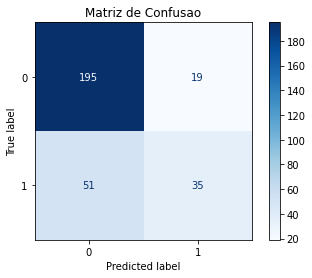

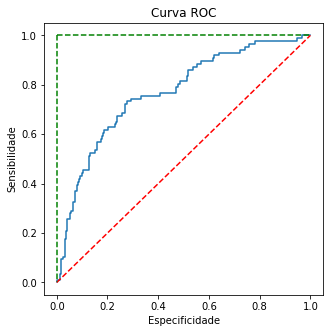

(LogisticRegression(max_iter=3000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7fd34f7ed550>)

In [ ]:
roda_modelo(base_dados, LogisticRegression(max_iter=3000))

#Aplicando Modelo

In [ ]:
#Treinar modelo com a base inteira

modelo = LogisticRegression(max_iter=1000)
y = base_dados['default']
x = base_dados.drop(columns='default')
modelo.fit(x, y)

LogisticRegression(max_iter=1000)